## MSN 514 HW:6
### Erinç Ada Ceylan 22101844

#### Figure 4.2

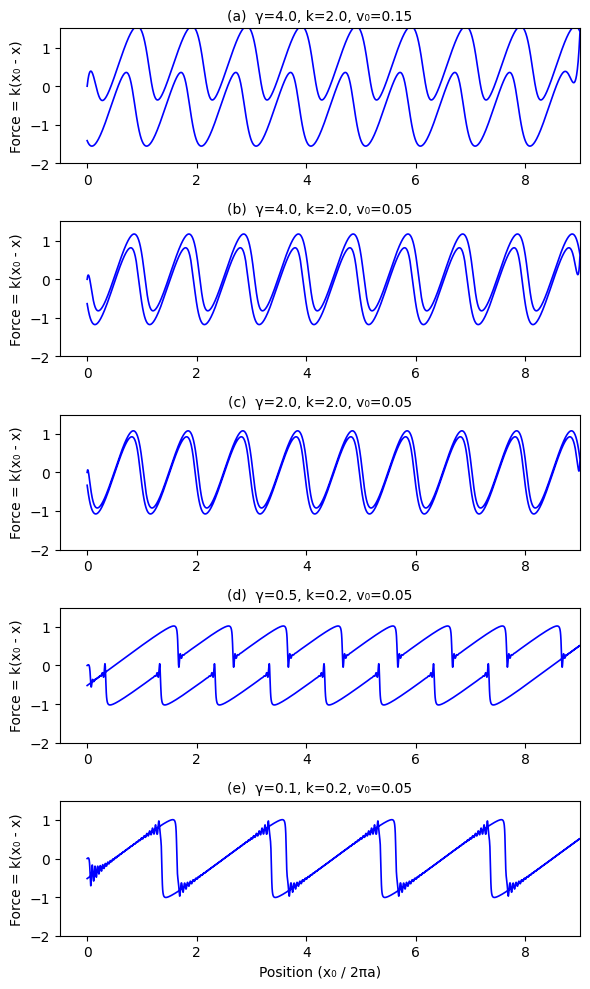

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_PT_loop(gamma, k, v0, steps=10000):
    half = steps // 2
    distance = 9.0 * 2.0 * np.pi
    T = distance / v0
    dt = T / half

    x0_arr = np.zeros(steps)
    x0_arr[:half] = np.linspace(0, distance, half, endpoint=False)
    x0_arr[half:] = np.linspace(distance, 0, steps-half)

    x = 0.0
    v = 0.0
    x_list = []

    for i in range(half):
        force = k*(x0_arr[i] - x) + np.sin(x)
        a = -gamma*v + force
        v += a*dt
        x += v*dt
        x_list.append(x)

    for i in range(half, steps):
        force = k*(x0_arr[i] - x) + np.sin(x)
        a = -gamma*v + force
        v += a*dt
        x += v*dt
        x_list.append(x)

    x_list = np.array(x_list)
    F_arr = k*(x0_arr - x_list)
    return x0_arr, F_arr

param_list = [
    ("(a)", 4.0, 2.0, 0.15),
    ("(b)", 4.0, 2.0, 0.05),
    ("(c)", 2.0, 2.0, 0.05),
    ("(d)", 0.5, 0.2, 0.05),
    ("(e)", 0.1, 0.2, 0.05),
]

plt.figure(figsize=(6,10))

for i, (lbl, gamma, k_val, v0) in enumerate(param_list, start=1):
    x0, F = simulate_PT_loop(gamma, k_val, v0, steps=10000)
    x0_scaled = x0 / (2.0*np.pi)
    plt.subplot(len(param_list), 1, i)
    plt.plot(x0_scaled, F, 'b-', lw=1.2)
    plt.title(f"{lbl}  γ={gamma}, k={k_val}, v₀={v0}", fontsize=10)
    plt.xlim([-0.5, 9])
    plt.ylim([-2, 1.5])
    plt.ylabel("Force = k(x₀ - x)")
    if i == len(param_list):
        plt.xlabel("Position (x₀ / 2πa)")

plt.tight_layout()
plt.show()


#### Figure 4.3 (a)

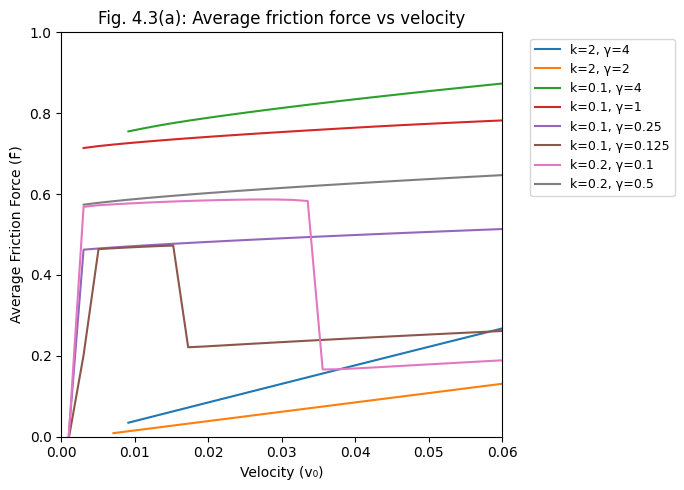

In [2]:
def average_friction_PT(gamma, k, v0, steps=20000):
    distance = 9.0 * 2.0 * np.pi
    if v0 == 0:
        return 0
    
    T = distance / v0
    dt = T / steps
    
    x0_arr = np.linspace(0, distance, steps, endpoint=False)

    x = 0.0  
    v = 0.0  
    friction_vals = []

    with np.errstate(all='ignore'):
        for i in range(steps):
            force = k * (x0_arr[i] - x) - np.sin(x)
            a = -gamma * v + force
            v += a * dt
            x += v * dt
            friction_vals.append(k * (x0_arr[i] - x))

    return np.mean(friction_vals)

vel_list = np.linspace(0.001, 0.06, 30)

param_list_4_3a = [
    (2.0, 4.0, "k=2, γ=4"),   
    (2.0, 2.0, "k=2, γ=2"),   
    (0.1, 4.0, "k=0.1, γ=4"), 
    (0.1, 1.0, "k=0.1, γ=1"),
    (0.1, 0.25, "k=0.1, γ=0.25"),
    (0.1, 0.125, "k=0.1, γ=0.125"),
    (0.2, 0.1, "k=0.2, γ=0.1"),
    (0.2, 0.5, "k=0.2, γ=0.5"),
]

plt.figure(figsize=(7,5))

for (k_val, gamma_val, label_txt) in param_list_4_3a:
    avgF_list = [average_friction_PT(gamma_val, k_val, v0, steps=15000) for v0 in vel_list]
    plt.plot(vel_list, avgF_list, label=label_txt)

plt.xlim([0, 0.06])
plt.ylim([0, 1.0])
plt.xlabel("Velocity (v₀)")
plt.ylabel("Average Friction Force (F̄)")
plt.title("Fig. 4.3(a): Average friction force vs velocity")

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=9)

plt.tight_layout()
plt.show()


#### Langevin dynamics, normally distributed random force

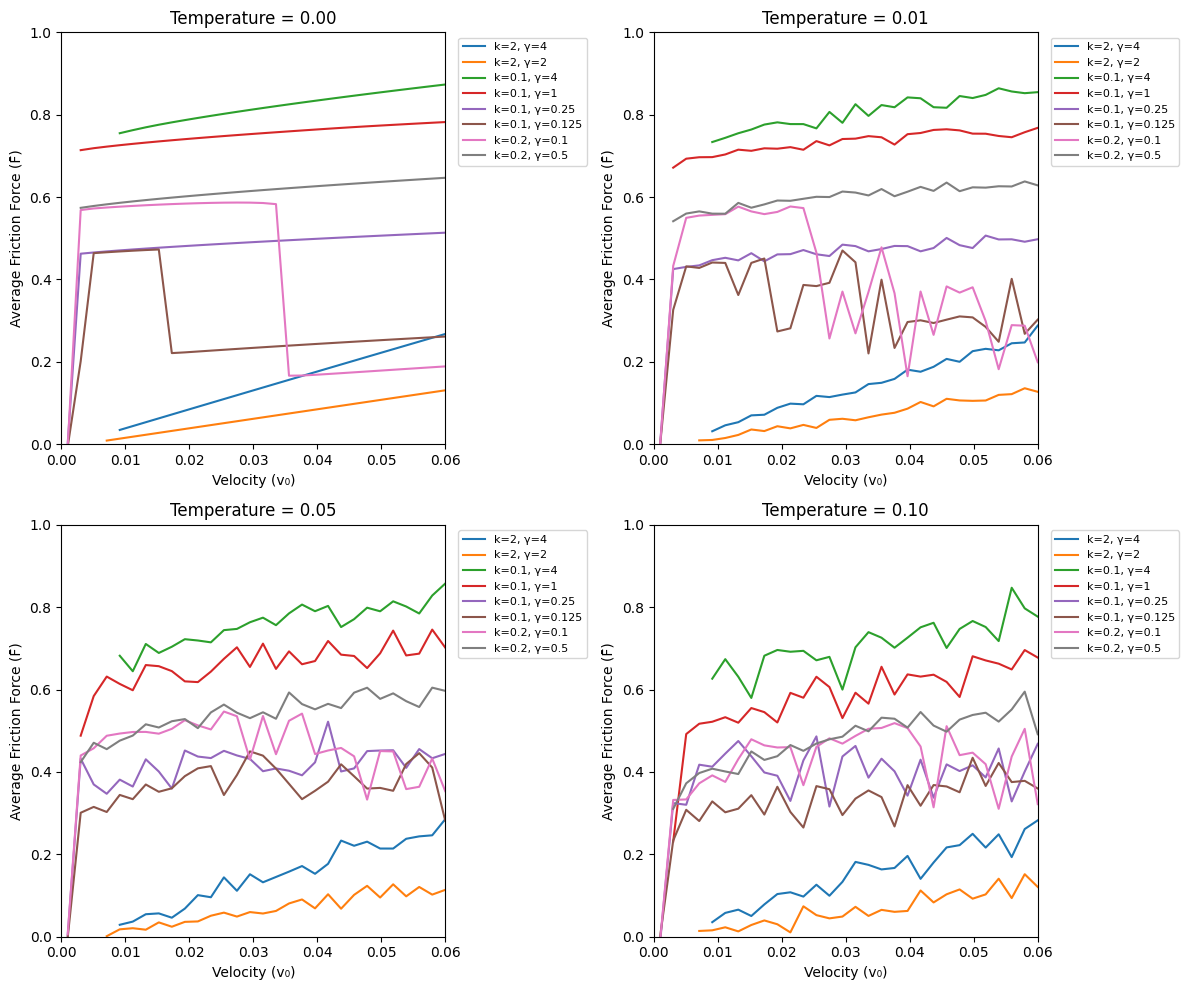

In [3]:
def average_friction_PT_thermal(gamma, k, v0, temperature, steps=20000):
    distance = 9.0 * 2.0 * np.pi
    if v0 <= 0:
        return 0.0  

    T = distance / v0
    dt = T / steps
    x0_arr = np.linspace(0, distance, steps, endpoint=False)

    x = 0.0  
    v = 0.0  
    friction_vals = []
    
    sigma = np.sqrt(2.0 * gamma * temperature / dt)

    with np.errstate(all='ignore'):
        for i in range(steps):
            force_det = k * (x0_arr[i] - x) - np.sin(x)
            force_rand = sigma * np.random.randn()
            force = force_det + force_rand
            a = -gamma * v + force
            v += a * dt
            x += v * dt
            friction_vals.append(k * (x0_arr[i] - x))

    return np.mean(friction_vals)

param_list_4_3a = [
    (2.0, 4.0, "k=2, γ=4"),   
    (2.0, 2.0, "k=2, γ=2"),   
    (0.1, 4.0, "k=0.1, γ=4"), 
    (0.1, 1.0, "k=0.1, γ=1"),
    (0.1, 0.25, "k=0.1, γ=0.25"),
    (0.1, 0.125, "k=0.1, γ=0.125"),
    (0.2, 0.1, "k=0.2, γ=0.1"),
    (0.2, 0.5, "k=0.2, γ=0.5"),
]

vel_list = np.linspace(0.001, 0.06, 30)
temp_values = [0.0, 0.01, 0.05, 0.1]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for t_index, T in enumerate(temp_values):
    ax = axes[t_index // 2, t_index % 2]
    for (k_val, gamma_val, label_txt) in param_list_4_3a:
        avgF_list = [average_friction_PT_thermal(gamma_val, k_val, v0, T, steps=15000) for v0 in vel_list]
        ax.plot(vel_list, avgF_list, label=label_txt)

    ax.set_xlim([0, 0.06])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel("Velocity (v₀)")
    ax.set_ylabel("Average Friction Force (F̄)")
    ax.set_title(f"Temperature = {T:.2f}")

for ax in axes.flat:
    ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=8)

plt.tight_layout()
plt.show()

